# Optimization Methods For Machine Learning: Homework 1

In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
import numpy as np 
import operator

In [2]:
from code_py.get_dataset import load_split_dataset
X_train,Y_train,X_test,Y_test=load_split_dataset(name="data/DATA.csv",fraction=0.744,seed=1942297)

# Exercise 1.1

## Hyperparameters Tuning MLP Network

In [3]:
from code_py.ex11 import MLP_Network
from code_py.hyperparamters_tuning import *

In [22]:
"""Hyperparameters Tuning
"""

MLP_hyp_params={
    "regularization": [ 1e-3,1e-5],
    "N_el":           [10,20,30,40],
    "sigma":          [1,1.5]}


In [23]:
MLP_combination = cartesian_combination(MLP_hyp_params)
print("Total Number of iterations: ", len(MLP_combination))

Total Number of iterations:  16


In [28]:
save = True

if save == True:
    
    HyperParameter_MLP_dict = {}
    HyperParameter_MLP_list= tuning_MLP_Network(MLP_combination,X_train,Y_train,n_jobs=2)
    HyperParameter_MLP_dict= HyperParameter_MLP_dict.fromkeys(MLP_combination, 0)
    HyperParameter_MLP_dict.update(zip(HyperParameter_MLP_dict, HyperParameter_MLP_list))
    
    save_dict("HyperParameter_MLP",HyperParameter_MLP_dict)

else:
    
    HyperParameter_MLP_dict = read_dict("HyperParameter_MLP")

In [30]:

HyperParameter_MLP_dict = sorted(HyperParameter_MLP_dict.items(), key=operator.itemgetter(1))
HyperParameter_MLP_dict

[((1e-05, 20, 1.5), (0.00033775387073526497, False)),
 ((1e-05, 20, 1), (0.0004137392245492129, False)),
 ((1e-05, 30, 1), (0.00042388706453280235, False)),
 ((1e-05, 30, 1.5), (0.0006577346748600325, False)),
 ((1e-05, 40, 1), (0.000786183019875258, False)),
 ((1e-05, 40, 1.5), (0.0011819242110403688, False)),
 ((1e-05, 10, 1), (0.004604682999514791, False)),
 ((0.001, 20, 1.5), (0.007439160608196645, False)),
 ((1e-05, 10, 1.5), (0.009495700353402251, False)),
 ((0.001, 30, 1.5), (0.011881496841319224, False)),
 ((0.001, 30, 1), (0.012509686372847164, False)),
 ((0.001, 10, 1), (0.013043834567411912, False)),
 ((0.001, 40, 1.5), (0.013238162743162508, False)),
 ((0.001, 40, 1), (0.013958814872320528, False)),
 ((0.001, 10, 1.5), (0.016696994366230053, False)),
 ((0.001, 20, 1), (0.024399082270890403, False))]

## MLP Network

In [7]:
"""
calling MLP_Network class for testing and plotting
"""

MLP_net = MLP_Network(x=X_train,y=Y_train,x_test=X_test,y_test=Y_test,rho=1e-3,sigma=1,N=50)
opt_pass, opt_v, opt_b, opt_w, opt_pass.x, opt_pass.fun, val_loss, train_loss = MLP_net.optim()
print("Validation Loss: ", val_loss)
print("Training Loss: ", train_loss)
print(opt_pass)

Time spent to optimize the function: 0.7590470314025879 sec
Validation Loss:  0.01059752221102225
Training Loss:  0.010929841836804262
     fun: 0.02215239212805757
     jac: array([ 2.23058511e-03, -5.13005103e-03,  6.55390069e-03,  4.20053721e-03,
        5.88313438e-03,  4.12551802e-03,  5.92376460e-04, -5.57210767e-03,
        3.42881676e-03,  3.54594806e-03, -4.76352038e-03,  5.69518952e-03,
       -3.44172403e-03,  3.73295532e-03,  5.30599948e-03, -4.57656195e-03,
        4.75413391e-03, -1.92285693e-03,  7.20603623e-03, -4.42541504e-03,
       -7.56917275e-03, -5.87472980e-03,  1.85484820e-03, -4.78213510e-03,
        4.30918529e-04,  5.69603258e-03,  3.64597158e-03,  7.73328389e-04,
        6.00389538e-03,  3.67921347e-03, -2.64633042e-03,  6.83475621e-03,
        4.50195406e-03, -5.46009957e-03, -3.90821768e-03, -4.14169496e-03,
        5.92061365e-03, -4.80691300e-03, -5.85396673e-03,  5.28139064e-03,
       -3.09760574e-03, -5.48495252e-03, -5.50971911e-03,  5.10850345e-03,


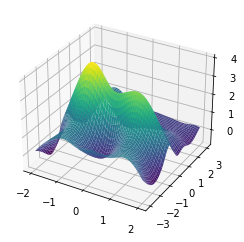

In [8]:
omega = np.concatenate((opt_v, opt_b, opt_w)).flatten()
MLP_net.Plot3D(omega)

# Exercise 1.2 

## Hyperparameters Tuning RBF Network

In [1]:
from code_py.hyperparamters_tuning import cartesian_combination
from code_py.hyperparamters_tuning import tuning_RBF_Network
from code_py.ex12 import RBF_Network

In [11]:
"""Hyperparameters Tuning
"""

RBF_hyp_params={
    "regularization": [1e-5, 1e-4, 1e-3],
    "N_el":           [30],
    "sigma":          [1.1,1.15,1.2,1.25]}

RBF_hyp_params={
    "regularization": [0.001],
    "N_el":           [5,10],
    "sigma":          [0.3]}

In [12]:
RBF_combination = cartesian_combination(RBF_hyp_params)
print("Total Number of iterations: ", len(RBF_combination))

Total Number of iterations:  2


In [13]:
save = True

if save == True:
    
    HyperParameter_RBF_dict = {}
    HyperParameter_RBF_list= tuning_RBF_Network(RBF_combination,X_train,Y_train,n_jobs=-1)
    HyperParameter_RBF_dict= HyperParameter_RBF_dict.fromkeys(RBF_combination, 0)
    HyperParameter_RBF_dict.update(zip(HyperParameter_RBF_dict, HyperParameter_RBF_list))
    
    save_dict("HyperParameter_RBF",HyperParameter_RBF_dict)

else:
    
    HyperParameter_RBF_dict = read_dict("HyperParameter_RBF")

In [14]:
HyperParameter_RBF_dict = sorted(HyperParameter_RBF_dict.items(), key=operator.itemgetter(1))
HyperParameter_RBF_dict

[((0.001, 10, 0.3), (0.7726731465436809, True)),
 ((0.001, 5, 0.3), (0.8034795996061344, True))]

## RBF Network  

In [15]:
"""
calling RBF_Network class for testing and plotting
"""
RBF_net = RBF_Network(x=X_train,y=Y_train,rho= 0.001,sigma=1,N=10)
RBF_opt_history = RBF_net.optim(verbose=True)[0]

Time spent to optimize the function: 2.2723278999328613 sec


## RBF Plot function 

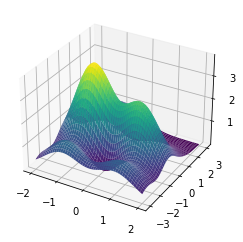

In [16]:
RBF_net.plot()

# Exercise 2.1

In [6]:
#from code_py.ex21 import MLP_Extreme_Opt
from code_py.trunc_normal_sampling import get_truncated_normal

In [3]:
from IPython import display
from scipy.optimize import minimize
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
from scipy.stats import truncnorm
import cvxpy as cvx
import numpy as np
np.random.seed(0)
from code_py.trunc_normal_sampling import get_truncated_normal
from tqdm import tqdm


class MLP_Extreme_Opt(object):

    def __init__(self, x_train, y_train,x_test,y_test, rho, sigma, N):  # bound_list):

        self.N = N
        self.x = x_train
        self.y = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.rho = rho
        self.sigma = sigma


    def tanh(self, t):
        result = (np.exp(2 * self.sigma * t) - 1) / (np.exp(2 * self.sigma * t) + 1)
        return result

    def forward_pass(self,b,w):
        return self.tanh(np.dot(self.x, w) + b)

    def train_loss(self,b,w,v):
        return (1/(2 * self.x.shape[0]))/np.sum(((self.forward_pass(b,w)@v.T)-self.y)**2)

    def validation_loss(self,b,w,v):
        forward_pass    = self.tanh(np.dot(self.x_test,w) +b)
        loss = (1/(2 * self.x.shape[0]))/np.sum(((forward_pass@v.T)-self.y_test)**2)
        return loss
         


    def convex_training_error_opt(self,b,w,verbose):

        v = cvx.Variable((1, self.N))
        reg_error = (cvx.norm(v, 2))**2
        mat = self.forward_pass(b,w)
        train_err = (1 / (2 * self.x.shape[0])) * cvx.sum_squares((mat@v.T)-self.y)
        cost = train_err + 0.5 * self.rho * reg_error
        objective = cvx.Minimize(cost)
        prob = cvx.Problem(objective)
        loss = prob.solve(solver=cvx.CVXOPT,verbose=verbose)

        v.value 
        return loss,v.value

    
    def Random_Sampling(self,n_sample):
        trunc_norm_params = {
            "low" : -3,
            "upp" :  3,
            "mean":  0,
            "sd"  :  1
        }

        sampling_history = {}
        print("sampling on truncated normal to look for the best b,w setting...")
        for sampling_idx in tqdm(range(n_sample)):
            w_rnd = get_truncated_normal(trunc_norm_params,self.x.shape[1]*self.N).reshape(self.x.shape[1],self.N)
            b_rnd = get_truncated_normal(trunc_norm_params,self.N).reshape(1, self.N)

            ext_MLP_net = MLP_Extreme_Opt(x_train=self.x,y_train=self.y,x_test=self.x_test,y_test=self.y_test,rho= self.rho,sigma=self.sigma,N=self.N) 
            obj= ext_MLP_net.convex_training_error_opt(b=b_rnd,w=w_rnd,verbose=False)
            omega = np.concatenate((b_rnd, w_rnd)).flatten()
            sampling_history[loss] = omega
            #print(loss)
        sampling_history_ = sorted(sampling_history.items())
        best_loss = sampling_history_[0][0]
        
        best_omega = sampling_history_[0][1]
        b = best_omega[:self.N].reshape(1, self.N)
        w = best_omega[self.N:].reshape(self.x.shape[1], self.N)
        print("Best Loss: ", best_loss)
        return obj


    def Plot3D(self,omega):

        x_1 = np.linspace(-2, 2, 50)
        x_2 = np.linspace(-3, 3, 50)
        x_1 = x_1.repeat(50)
        x_2 = np.tile(x_2, 50)
        new_x = np.concatenate((x_1.reshape(2500, 1), x_2.reshape(2500, 1)), axis=1)

        omega_ = omega.copy()
        v = omega_[:self.N].reshape(1, self.N)
        b = omega_[self.N:2 * self.N].reshape(1, self.N)
        w = omega_[2 * self.N:].reshape(new_x.shape[1], self.N)


        new_y = np.dot(self.tanh(np.dot(new_x, w) + b), v.T)
        a_1_ = np.reshape(x_1, (50, 50))
        a_2_ = np.reshape(x_2, (50, 50))
        y_ = np.reshape(new_y, (50, 50))
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.plot_surface(a_1_, a_2_, y_, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
        plt.show()

In [9]:
n_elem = 40
trunc_norm_params = {
    "low" : -3,
    "upp" :  3,
    "mean":  0,
    "sd"  :  1
}
w_rnd = get_truncated_normal(trunc_norm_params,X_train.shape[1]*n_elem).reshape(X_train.shape[1],n_elem)
b_rnd = get_truncated_normal(trunc_norm_params,n_elem).reshape(1, n_elem)

In [10]:
ext_MLP_net = MLP_Extreme_Opt(x_train=X_train,y_train=Y_train,x_test=X_test,y_test=Y_test,rho=1e-4,sigma=1,N=40)

In [11]:
ext_MLP_net.convex_training_error_opt(b=w_rnd,w=b_rnd,verbose=False)

ValueError: shapes (186,2) and (1,40) not aligned: 2 (dim 1) != 1 (dim 0)

In [6]:
import numpy as np
ext_MLP_net = MLP_Extreme_Opt(x_train=X_train,y_train=Y_train,x_test=X_test,y_test=Y_test,rho= 0.001,sigma=0.5,N=n_elem,w=w_rnd,b=b_rnd) 
loss,v_ext_opt   = ext_MLP_net.convex_training_error_opt(verbose=False)
omega = np.concatenate((v_ext_opt, b_rnd, w_rnd)).flatten()

In [7]:
print("Train Loss: ", ext_MLP_net.train_loss(v_ext_opt))
print("Validation Loss: ", ext_MLP_net.validation_loss(v_ext_opt))


Train Loss:  0.0003288843718454569
Validation Loss:  0.0009042912094834109


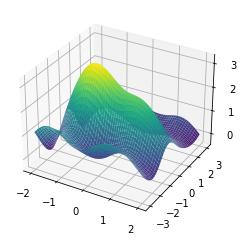

In [8]:
ext_MLP_net.Plot3D(omega)

# Exercise 2.2

### Picking N of the P points of the training set

In [22]:
from code_py.ex22 import RBF_Extreme_Opt

In [23]:
ext_RBF_net = RBF_Extreme_Opt(x=X_train,y=Y_train,rho=1e-5,sigma=1.15,N=80)

In [24]:
loss,v_opt = ext_RBF_net.convex_training_error_opt(verbose=False)
c_ext      = ext_RBF_net.c
omega      = np.concatenate((v_opt, c_ext)).flatten()

In [25]:
print("Loss: ", loss)
#print("Optimal v: ",v_opt)

Loss:  0.0001945632865300042


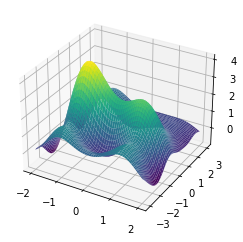

In [26]:
ext_RBF_net.Plot3D(omega)

# Kmeans

In [27]:
ext_RBF_net_KM = RBF_Extreme_Opt(x=X_train,y=Y_train,rho=1e-5,sigma=1.15,N=80,c_flag=False)

In [28]:
loss,v_opt    = ext_RBF_net_KM.convex_training_error_opt(False)
c_ext         = ext_RBF_net_KM.c
omega         = np.concatenate((v_opt, c_ext)).flatten()

In [29]:
print("Loss: ", loss)
#print("Optimal v: ",v_opt)

Loss:  4.627014655100633e-05


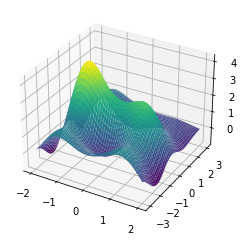

In [30]:
ext_RBF_net_KM.Plot3D(omega)

# Exercise 3 

In [11]:
from code_py.trunc_normal_sampling import get_truncated_normal
from code_py.ex3 import Two_Blocks_Optimization
import numpy as np

In [12]:
n_elem = 80
#numpy.random.seed(333)
trunc_norm_params = {
    "low" : -3,
    "upp" :  3,
    "mean":  0,
    "sd"  :  1
}
w = get_truncated_normal(trunc_norm_params,X_train.shape[1]*n_elem).reshape(X_train.shape[1],n_elem)
b = get_truncated_normal(trunc_norm_params,n_elem).reshape(1, n_elem)
v = get_truncated_normal(trunc_norm_params,n_elem).reshape(1, n_elem)

In [13]:
two_blocks_opt = Two_Blocks_Optimization(X_train, Y_train, X_test, Y_test, 1e-5,1.5, n_elem)

In [14]:
from scipy.linalg import norm

In [16]:
Early_Stopping = False
min_delta=1e-4
patiente=3
count=0
val_loss_plot   = []
train_loss_plot = []
success_counter = []
norm_history =[]
plot_flag = True
current=0

while Early_Stopping == False:

    opt_pass,opt_b, opt_w, opt_pass.x, opt_pass.fun, val_loss, train_loss=two_blocks_opt.optim(np.concatenate((b,w)).flatten(),v)
    loss,v_opt=two_blocks_opt.optime_cvx_block(opt_w,opt_b)
    
    grad_b = opt_pass.x[:two_blocks_opt.N].reshape(1, two_blocks_opt.N)
    grad_w = opt_pass.x[two_blocks_opt.N:].reshape(two_blocks_opt.x.shape[1],two_blocks_opt.N)
    grad = norm(grad_b+grad_w)
    print(opt_pass)
    if (np.abs(val_loss-current)>=1e-4):
        current = val_loss
        
        count = 0
        Early_Stopping = False
        w,b,v=opt_w,opt_b,v_opt
    
    elif (np.abs(val_loss-current)<=1e-4):
        count+=1
        Early_Stopping = False
        if count==3:
            print("Number of sub-problems solved: ", sum(success_counter))
            Early_Stopping = True
           
    

    print("Validation Loss: ", val_loss) 
    success_counter.append(opt_pass.success)
    val_loss_plot.append(val_loss)
    train_loss_plot.append(train_loss)
    norm_history.append(norm(grad_b)+norm(grad_w))
    


     fun: 151.0501275158176
     jac: array([ 5.80418288e-05,  9.82625125e-04,  2.82831627e-04,  1.20425066e-03,
        2.53991184e-06, -1.27293295e-04, -3.81232091e-04,  5.07307306e-04,
       -2.23663165e-05, -2.05447340e-05,  1.24022993e-04, -7.77638122e-06,
        7.52318048e-05, -9.06238111e-05,  2.71143717e-05, -2.79595691e-04,
       -9.48042641e-05, -1.77040740e-04,  1.33755713e-06,  6.22209944e-05,
        4.48227803e-05,  3.28538790e-05, -1.08281367e-05,  1.92642432e-05,
       -1.37531165e-04,  1.15310613e-04,  2.26010324e-03,  7.15840378e-04,
        1.78448168e-04, -1.27024778e-03,  2.54609738e-05, -7.82997579e-06,
       -5.17424441e-06,  6.77116804e-04,  1.09191602e-05, -2.98316152e-04,
       -1.57171947e-04,  8.07458921e-06,  9.50537846e-05, -8.39273486e-05,
        2.24508518e-04, -8.82252459e-04,  2.66851742e-04, -3.99963865e-04,
       -1.45737000e-05,  2.06198154e-04, -6.38310895e-05,  4.75418457e-04,
        4.90005078e-05,  9.50693716e-05, -4.88575938e-06,  4.1

In [88]:
omega = np.concatenate((v, b, w)).flatten()

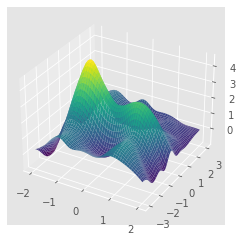

In [89]:
two_blocks_opt.Plot3D(omega)

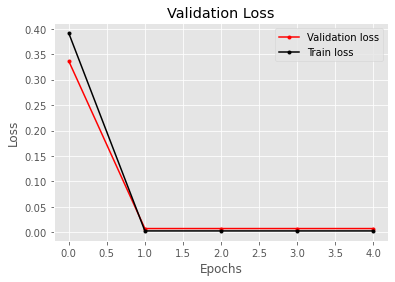

In [90]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
xx = np.arange(0,len(val_loss_plot))
plt.plot(xx, val_loss_plot, '-ok', color='red',markersize=3,label="Validation loss")
plt.plot(xx, train_loss_plot, '-ok', color='black',markersize=3,label="Train loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Validation Loss')
plt.legend(loc="upper right")
plt.show()

In [12]:
from IPython import display
from scipy.optimize import minimize
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
from scipy.stats import truncnorm
import cvxpy as cvx
import numpy as np
np.random.seed(0)
from code_py.trunc_normal_sampling import get_truncated_normal
from tqdm import tqdm


class MLP_Extreme_Opt(object):

    def __init__(self, x_train, y_train,x_test,y_test, rho, sigma, N):  # bound_list):

        self.N = N
        self.x = x_train
        self.y = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.rho = rho
        self.sigma = sigma


    def tanh(self, t):
        result = (np.exp(2 * self.sigma * t) - 1) / (np.exp(2 * self.sigma * t) + 1)
        return result

    def forward_pass(self,b,w):
        return self.tanh(np.dot(self.x, w) + b)

    def train_loss(self,b,w,v):
        return (1/(2 * self.x.shape[0]))/np.sum(((self.forward_pass(b,w)@v.T)-self.y)**2)

    def validation_loss(self,b,w,v):
        forward_pass    = self.tanh(np.dot(self.x_test,w) +b)
        loss = (1/(2 * self.x.shape[0]))/np.sum(((forward_pass@v.T)-self.y_test)**2)
        return loss
         


    def convex_training_error_opt(self,b,w,verbose):

        v = cvx.Variable((1, self.N))
        reg_error = (cvx.norm(v, 2))**2
        mat = self.forward_pass(b,w)
        train_err = (1 / (2 * self.x.shape[0])) * cvx.sum_squares((mat@v.T)-self.y)
        cost = train_err + 0.5 * self.rho * reg_error
        objective = cvx.Minimize(cost)
        prob = cvx.Problem(objective)
        loss = prob.solve(solver=cvx.CVXOPT,verbose=True)

        v.value 
        return loss,v.value

    
    def Random_Sampling(self,n_sample):
        trunc_norm_params = {
            "low" : -3,
            "upp" :  3,
            "mean":  0,
            "sd"  :  1
        }

        sampling_history = {}
        print("sampling on truncated normal to look for the best b,w setting...")
        for sampling_idx in tqdm(range(n_sample)):
            w_rnd = get_truncated_normal(trunc_norm_params,self.x.shape[1]*self.N).reshape(self.x.shape[1],self.N)
            b_rnd = get_truncated_normal(trunc_norm_params,self.N).reshape(1, self.N)

            ext_MLP_net = MLP_Extreme_Opt(x_train=self.x,y_train=self.y,x_test=self.x_test,y_test=self.y_test,rho= self.rho,sigma=self.sigma,N=self.N) 
            loss,_      = ext_MLP_net.convex_training_error_opt(b=b_rnd,w=w_rnd,verbose=False)
            omega = np.concatenate((b_rnd, w_rnd)).flatten()
            sampling_history[loss] = omega
            #print(loss)
        sampling_history_ = sorted(sampling_history.items())
        best_loss = sampling_history_[0][0]
        
        best_omega = sampling_history_[0][1]
        b = best_omega[:self.N].reshape(1, self.N)
        w = best_omega[self.N:].reshape(self.x.shape[1], self.N)
        print("Best Loss: ", best_loss)
        return b,w


    def Plot3D(self,omega):

        x_1 = np.linspace(-2, 2, 50)
        x_2 = np.linspace(-3, 3, 50)
        x_1 = x_1.repeat(50)
        x_2 = np.tile(x_2, 50)
        new_x = np.concatenate((x_1.reshape(2500, 1), x_2.reshape(2500, 1)), axis=1)

        omega_ = omega.copy()
        v = omega_[:self.N].reshape(1, self.N)
        b = omega_[self.N:2 * self.N].reshape(1, self.N)
        w = omega_[2 * self.N:].reshape(new_x.shape[1], self.N)


        new_y = np.dot(self.tanh(np.dot(new_x, w) + b), v.T)
        a_1_ = np.reshape(x_1, (50, 50))
        a_2_ = np.reshape(x_2, (50, 50))
        y_ = np.reshape(new_y, (50, 50))
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.plot_surface(a_1_, a_2_, y_, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
        plt.show()

In [14]:
import numpy as np
from tqdm import tqdm
import time
from code_py.ex21 import MLP_Extreme_Opt
from code_py.get_dataset import load_split_dataset
from code_py.trunc_normal_sampling import get_truncated_normal
np.random.seed(0)


X_train,Y_train,X_test,Y_test=load_split_dataset(name="data/DATA.csv",fraction=0.744,seed=1942297)

ext_MLP_net = MLP_Extreme_Opt(x_train=X_train,y_train=Y_train,x_test=X_test,y_test=Y_test,rho=1e-3,sigma=1,N=40) 

best_b, best_w = ext_MLP_net.Random_Sampling(100)




  3%|▎         | 3/100 [00:00<00:04, 23.79it/s]

sampling on truncated normal to look for the best b,w setting...


100%|██████████| 100/100 [00:04<00:00, 24.43it/s]

Best Loss:  0.0362455871301296


In [ ]:
ext_MLP_net = MLP_Extreme_Opt(x_train=X_train,y_train=Y_train,x_test=X_test,y_test=Y_test,rho=1e-4,sigma=1,N=40)
start = time.time()
loss,v_ext_opt   = ext_MLP_net.convex_training_error_opt(b=best_b,w=best_w,verbose=False)
end   = time.time()
omega = np.concatenate((v_ext_opt, best_b, best_w)).flatten()
ext_MLP_net.Plot3D(omega)

19.83126370644502

In [40]:
import cvxpy as cp
import numpy as np

# Problem data.
m = 30
n = 20
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)

# Construct the problem.
x = cp.Variable(n)
objective = cp.Minimize(cp.sum_squares(A @ x - b))
constraints = [0 <= x, x <= 1]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve(solver=cvx.CVXOPT,verbose=True)
# The optimal value for x is stored in `x.value`.
# The optimal Lagrange multiplier for a constraint is stored in
# `constraint.dual_value`.

                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Nov 11 01:34:34 PM: Your problem has 20 variables, 2 constraints, and 0 parameters.
(CVXPY) Nov 11 01:34:34 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 11 01:34:34 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 11 01:34:34 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Nov 11 01:34:34 PM: Compiling problem (target solver=CVXOPT).
(CVXPY) Nov 11 01:34:34 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing 

In [43]:
objective

Minimize(Expression(CONVEX, NONNEGATIVE, ()))

In [44]:
result

19.831262994196937